<a href="https://colab.research.google.com/github/lucywowen/csci547_ML/blob/main/examples/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is dimensionality reduction?

In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reduction of n-dimensions to a k-dimensions where k<<n.

Dimensionality reduction can help with:

- Space required to store the data gets increased with increasing dimensions.
- Less dimensions will take low time complexity in training a model.
- As dimensions increases, the possibility of overfitting the model also gets increased.
- We cannot visualize a high dimensional data. By dimensionality reduction we will reduce the data to 2D or 3D for better visualization.
- Can remove correlated features in our data.



<img alt="first image" src="https://miro.medium.com/v2/resize:fit:948/format:webp/1*hM0-FieMKYTU9Inuz7rRXg.jpeg" width=500>

Lets look at that example in the slides... using the Iris data:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)
X.columns = ['s_length', 's_width', 'p_length', 'p_width']

X.shape, y.shape


((150, 4), (150,))

Ok first lets plot this in 2D

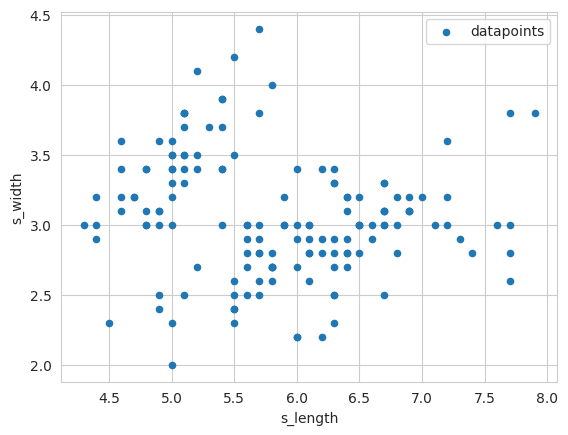

In [24]:
# label, color are optional parameters
X.plot(x='s_length',y='s_width',kind='scatter',label='datapoints');
plt.show()

In [25]:
# Merge the X and y matrices to get the labels
df_merged = pd.concat([X, y], axis=1)



And lets at the labels:


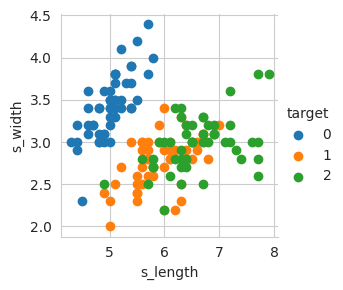

In [26]:
df_merged = pd.concat([X, y], axis=1)
# using seaborn lib to stylize the graph
# sns is seaborn as imported above
sns.set_style("whitegrid");

# hue = 'species' -> color encoding based on
# distinct species here 3 types so 3 colors

#size -> size of the graph
sns.FacetGrid(df_merged, hue='target') \
    .map(plt.scatter, 's_length','s_width') \
    .add_legend();
plt.show();

Now lets plot this in 3D:

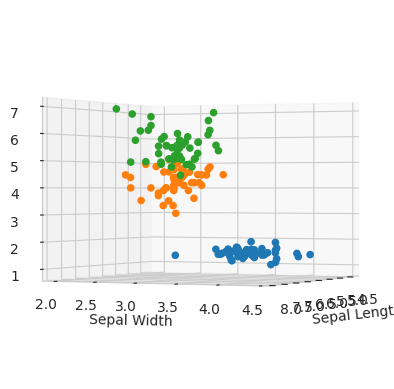

In [27]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot data points for each species in different colors
for species, group in df_merged.groupby('target'):
    ax.scatter(group['s_length'], group['s_width'], group['p_length'], alpha=1)
# Label the axes
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.view_init(elev=0, azim=25)
plt.show()

And you can animate this plot if you want:

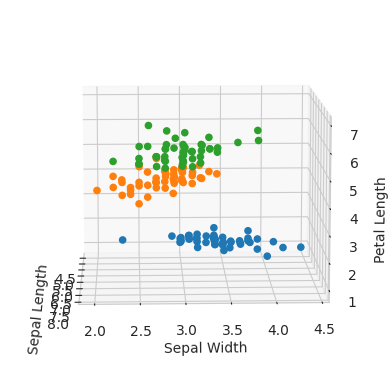

In [28]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot data points for each species in different colors
for species, group in df_merged.groupby('target'):
    try_it = ax.scatter(group['s_length'], group['s_width'], group['p_length'],
                        alpha=1)
# Label the axes
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')


# Define the animation function
def animate(i):
    ax.view_init(elev=10, azim=i)
    return try_it,

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 2), interval=50, blit=True)

# Save the animation as a gif
ani.save('rotating_3d.gif', writer='imagemagick')

Ok and now lets plot this in 4D... using alpha to display our 4th feature (we just need to normalize it because alpha needs to be within 0 and 1).

In [30]:

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


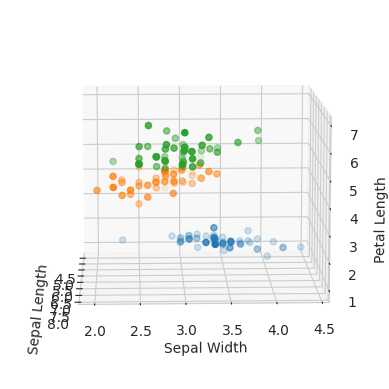

In [31]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot data points for each species in different colors
for species, group in df_merged.groupby('target'):
    try_it = ax.scatter(group['s_length'], group['s_width'], group['p_length'],
               alpha=NormalizeData(group['p_width']))
# Label the axes
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')


# Define the animation function
def animate(i):
    ax.view_init(elev=10, azim=i)
    return try_it,

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 2), interval=50, blit=True)

# Save the animation as a gif
ani.save('rotating_4d_alpha.gif', writer='imagemagick')

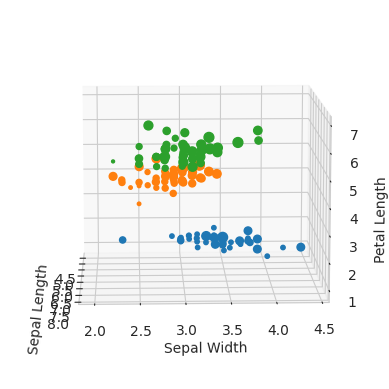

In [32]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot data points for each species in different colors
for species, group in df_merged.groupby('target'):
    try_it = ax.scatter(group['s_length'], group['s_width'], group['p_length'],
               s=(NormalizeData(group['p_width'])*50), alpha=1)
# Label the axes
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')


# Define the animation function
def animate(i):
    ax.view_init(elev=10, azim=i)
    return try_it,

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 2), interval=50, blit=True)

# Save the animation as a gif
ani.save('rotating_4d_size.gif', writer='imagemagick')

To imagine these 4D interactions, you can always plot the features pairwise... but as you can see, this also is already a lot of information, as we only have 4 features!

<Figure size 500x500 with 0 Axes>

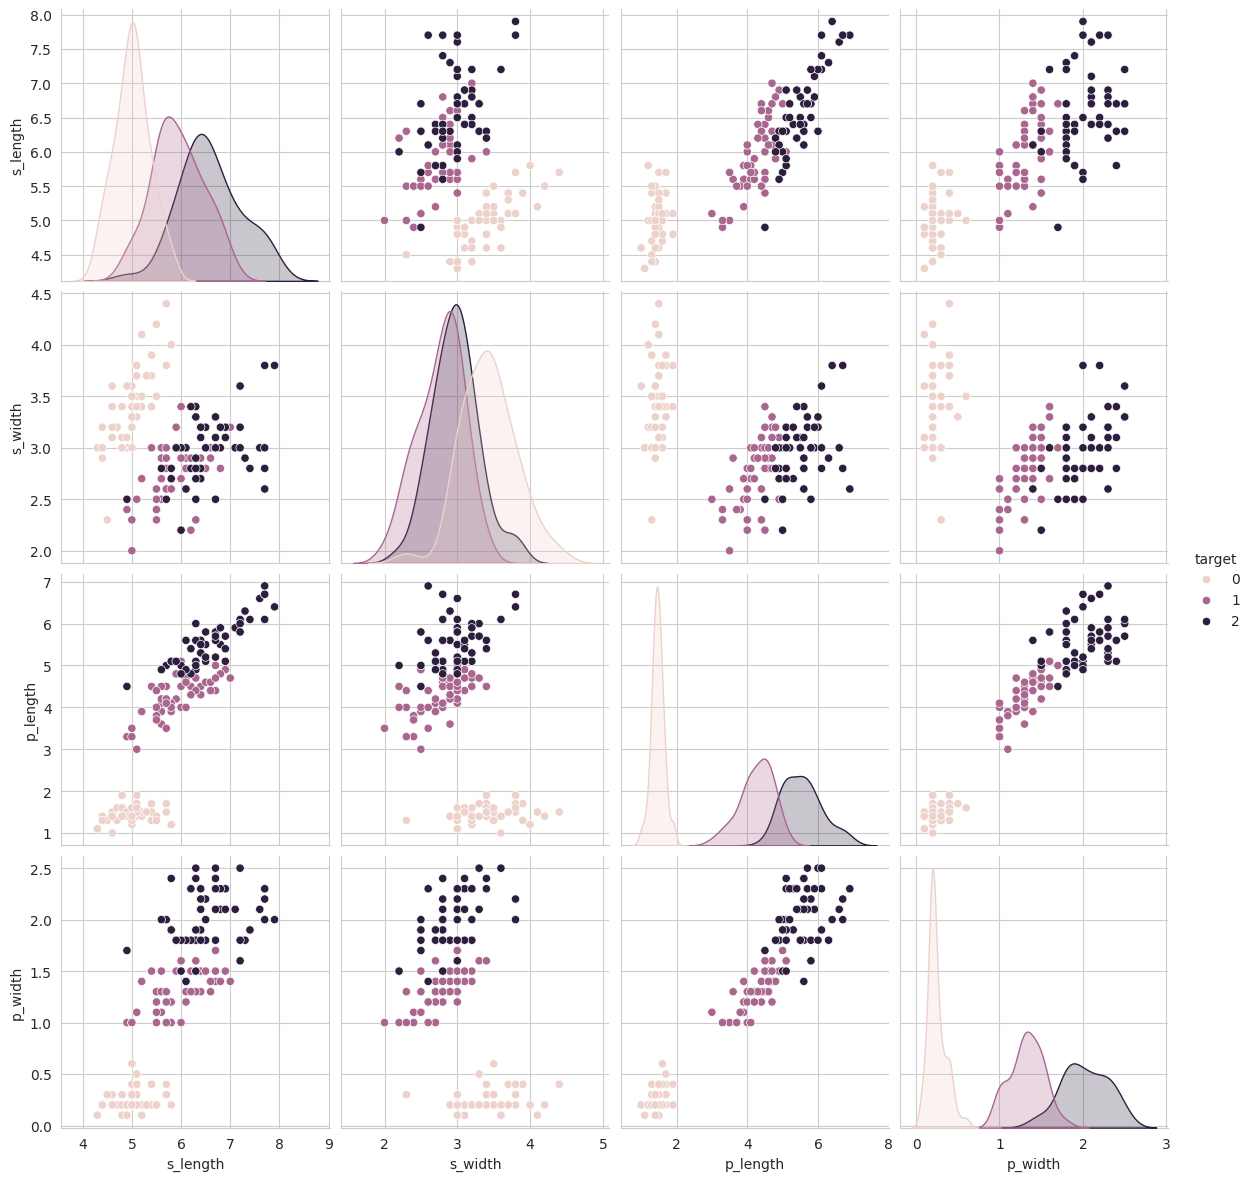

In [12]:
fig = plt.figure(figsize=(5, 5))

sns.set_style("whitegrid");
sns.pairplot(df_merged,hue='target',height=3);
plt.show()

Ok all this is to say... it's really hard to effectively visualize data beyond ~3D.  SO... what do we do?  We can compress the data, to better understand it!

Lets start with PCA first.

# PCA
PCA was invented in 1901 by Karl Pearson as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by Harold Hotelling in the 1930s. Depending on the field of application, it is also named the discrete KLT in signal processing, the Hotelling transform in multivariate quality control, proper orthogonal decomposition, singular value decomposition (SVD) of X , eigenvalue decomposition, factor analysis , spectral decomposition in noise and vibration, and empirical modal analysis in structural dynamics.

PCA is mostly used as a tool in exploratory data analysis (EDA) and for making predictive models. It is often used to visualize genetic distance and relatedness between populations. PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix or singular value decomposition of a data matrix.

### Working methodology of PCA:

For better understanding of principle working of PCA let’s take 2D data.

<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*fsmQMsTUmGlVocmPb25_2Q.png" width=700>




<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1364/format:webp/1*1BHI5olPI4te-7V2I_rFYg.png" width=500>

1. Firstly we will normalize the data such that the average value shifts to the origin and all the data lie in a unit square.
2. Now we will try to fit a line to the data. For that we will try out with a random line. Now we will rotate the line until it fits best to the data.

Ultimately we end up with the following fit (high degree of fit) which explains the maximum variance of a feature.


<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*4XZzGobQIdYxmDwF4cfw8A.png" width=500>

#### How PCA finds the best fitting line?

Let’s work out with a single point.

<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*9gig0XkvbW-t3fnQyRQmgg.png" width=500>


Now to quantity how good the line fits to the data, PCA projects the data onto it.


<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*8HDovvHDzayaKqapGiWsUQ.png" width=500>

i) Then it can measure the distances from the data to the line and try to find a line that minimizes those distances.

ii) or it can try to find the line that maximizes the distances from the projected points to the origin.


Mathematical Intuition :

To understand the math behind this technique let’s back to our single data point concept.



<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1342/format:webp/1*Xh52nhLqUwQxSI4_UHFK_Q.png" width=500>


After projecting the data onto the line we will get a right angled triangle. Now from pythogoras theorem we get A² = B² + C². We can see that B and C are inversely proportional to each other. That means if B gets larger then c must be smaller and vice versa.

**Thus PCA can either minimize the distances to the line or maximize the distances from the projected point to the origin.**

Since it's easier to find the maximum distance from the projected point to the origin, PCA finds the best fitting line that maximizes the sum of the squared distances from the projected points to the origin.

<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*HKnUTiunE0gOjB4wsMsfTA.png" width=500>


Here's the cost function for PCA:

<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1004/format:webp/1*H_IS64XL984-Jk8BR0FJOw.png" width=500>


Note : Here we are taking squares of the distances so that the negative values won’t cancel the positive values.

Now we got the best fitting line `y = mx + c`. This is called PC1 (Principle component 1). Let’s assume we got proportions 4:1 that means we go 4 units on X-axis and 1 unit on Y-axis which explains that the data is mostly spread on the X-axis.

<img alt="first image" src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*gBgPALX21brSfZg4rmnhSw.png" width=500>

From the pythagorean theorem

`a² = b² + c²` => `a² = 4² + 1²` => `sqrt(17)`=> `4.12` But the data is scaled hence we divide each side with 4.12 in order to get the unit vector. i.e.,

`F1 = 4 / 4.12 = 0.97` and

`F2 = 1 / 4.12 = 0.242`

The unit vector that we just calculated is called Eigen vector or PC1 and the proportions of features (0.97 : 0.242) are called loading scores.

`SS( distances for PC1 ) = Eigen values for PC1`.

`sqrt( Eigen values for PC1 ) = Singular value for PC1`.

Now we do the same thing for other features to get principal components. For projecting the data now we will rotate the axis so that PC1 gets parallel (horizontal) to the X-axis.

<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*t28jQ52q5q-LZBV9goYCyw.png" width=500>


Rotating the axis so PC1 is horizontal.


<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Vr5-JbLzB6gKSRssZ8Kw5w.png" width=500>
Projecting the data basing on principal components.

For visualization let’s project the data based on the projected points on both principal components.

We can see that it is equal to the original projection of points.

#### How to calculate variation?

We can calculate it using eigenvalues which is calculated in PCA.


<img alt="first image" src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ti0f-Y8CA41FUYQ4en055A.png" width=500>

Let suppose we got variation for PC1 = 0.83 and for PC2 = 0.17

Now if we want to convert the data from 2D to 1D we choose PC1 as a final 1D since it covers 83% of the total variation.

<img alt="first image" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*3PSD50Y0yJbl-Ff4ULobdA.png" width=500>

Therefore, PCA is based on the variance explained using principal components to estimate the features to be eliminated for dimensionality reduction.


## Advantages and Disadvantages:

Advantages :

- It can help find correlated features.
- Improves model efficiency.
- Improves Visualization.

Disadvantages :

- PCA is a linear algorithm and it won’t work very well for polynomial or other complex functions wihtout some extra tricks.
- Loss of information if we won’t choose the right number of dimensions to get eliminated.
- Less interpretability, since the original features transforms to principal components which are not as readable as original features.
- It preserves global shapes rather than local shapes.


Ok so now let's perform PCA on our Iris data we were playing with earlier.

In [33]:
X.head()

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Ok let's calucalte the covariance matrix (we can do this either using the `.cov()` method, or the equation we used in class.

In [178]:
Z=StandardScaler().fit_transform(X)
print(scaler.shape)

(150, 4)


In [179]:
covariance_matrix=np.matmul(Z.T,Z)
print(covariance_matrix.shape)

(4, 4)


<Axes: >

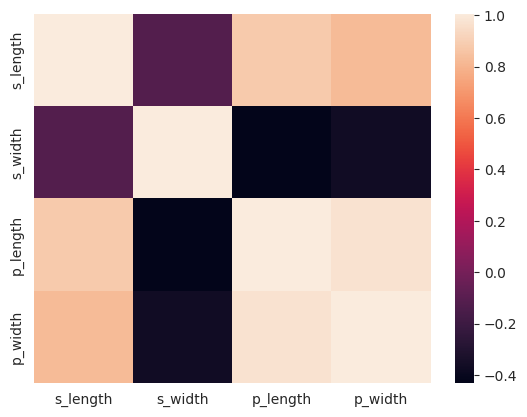

In [180]:
sns.heatmap(C)

<Axes: >

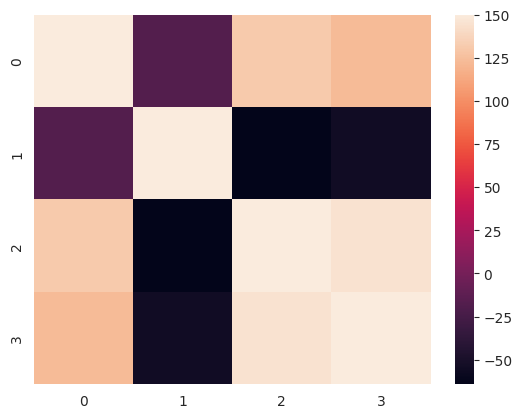

In [181]:
sns.heatmap(covariance_matrix)

Now, we can use that covariance matrix and we can use it for finding the eigen values and eigen vectors. After transforming the data to 2 dimensions, we will use those 2 features for visualization of data.

In [188]:
from scipy.linalg import eigh

values,vectors=eigh(covariance_matrix,eigvals=[2,3])
print(vectors.shape)

#calculating the %variance
preserved_variance=values[1]/(values[0]+values[1])
print("The amount of variance we preserved after dimensionality reduction to 2 :",int(preserved_variance*100))
#I have preserved nearly 58% of the data
#step-4: dimension reduction

new_data=np.matmul(Z,vectors)
new_data=new_data.T
print(new_data.shape)
#PCA(principal component analysis)
# plotting the datapoints

new_data=np.vstack((new_data,y))
new_data=new_data.T
print(new_data.shape)

# converting the matrix into dataframe

dataframe=pd.DataFrame(data=new_data,columns=["1st","2nd","label"])
dataframe.head(5)

(4, 2)
The amount of variance we preserved after dimensionality reduction to 2 : 76
(2, 150)
(150, 3)


,1st,2nd,label
0,-0.480027,-2.264703,0.0
1,0.674134,-2.080961,0.0
2,0.341908,-2.364229,0.0
3,0.597395,-2.299384,0.0
4,-0.646835,-2.389842,0.0


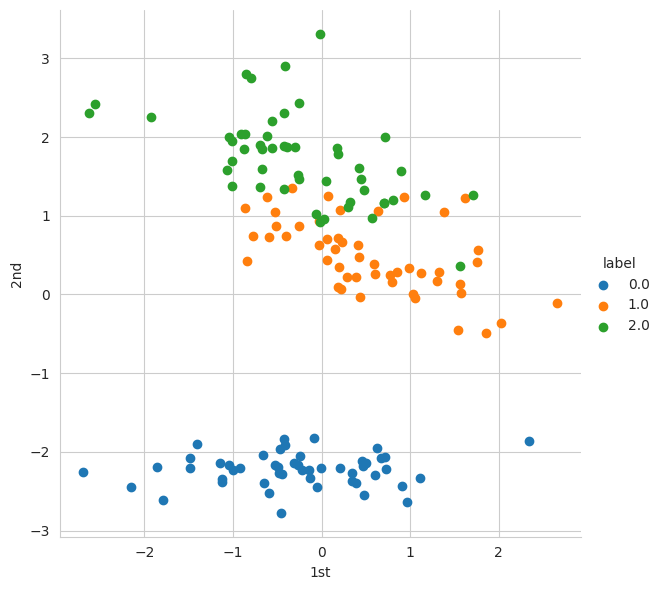

In [189]:
#import seaborn as sns
sns.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

Ok but we can also use `sklearn` to perform all these caluculations:

In [190]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(X).T
print(pca_data.shape)

(2, 150)


In [191]:
pca_new=np.vstack((pca_data,y)).T
print(pca_new.shape)
#converting into dataframe
df=pd.DataFrame(data=pca_new,columns=["1st","2nd","labels"])
df.head(5)

(150, 3)


,1st,2nd,labels
0,-2.684126,0.319397,0.0
1,-2.714142,-0.177001,0.0
2,-2.888991,-0.144949,0.0
3,-2.745343,-0.318299,0.0
4,-2.728717,0.326755,0.0


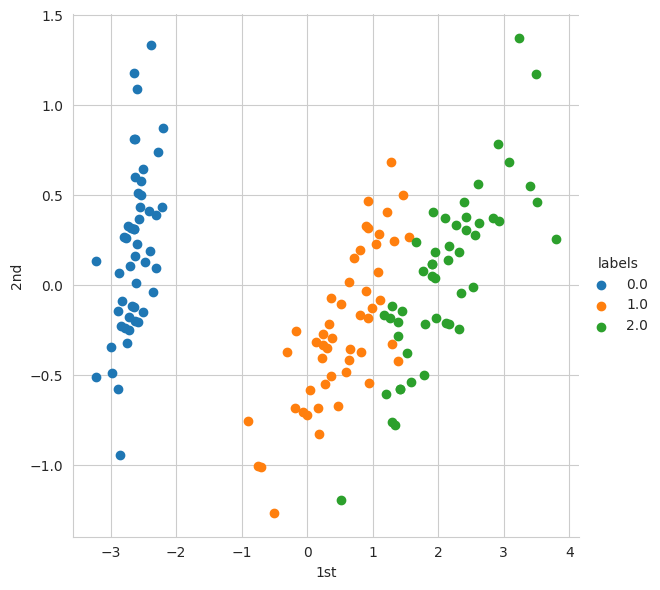

In [192]:
#plotting the df
sns.FacetGrid(df,hue="labels",height=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

If I want to preserve 80% of the data information then I can reduce the dimensions to 110. These plot will help us to choose the right number of features for elimination.

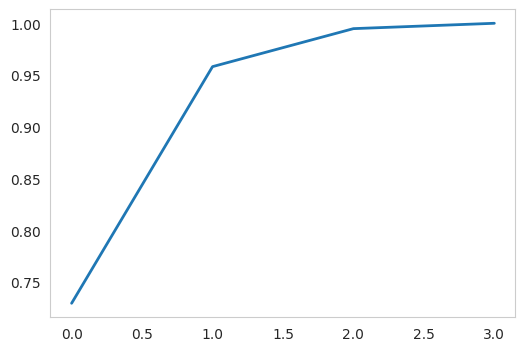

In [194]:
# percentage_variance_explained
pca.n_components=4
pca_data=pca.fit_transform(Z)
var_per=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_sum=np.cumsum(var_per)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_sum,linewidth=2)
plt.grid()
plt.show()

Let's break that down a bit more:

The procedure of PCA to work is to

map X to z-scores, Z,

compute the covariance matrix C of Z, and

apply singular-value decomposition (SVD) to Z resulting in U, S, VT.

Here are the denotations.

X: data

Z: data mapped to z-scores

C: covariance matrix of Z

U: left-hand eigen-vectors

S: eigen-values

VT: right-hand eigen-vectors

Getting Z and C is performed as follows.


In [195]:
from scipy.stats import zscore

Z = X.apply(zscore)
C = Z.cov()

In [196]:
from numpy.linalg import svd

U, S, VT = svd(C, full_matrices=False)

U.shape, S.shape, VT.shape

((4, 4), (4,), (4, 4))

### Interpretation of S

When S is normalized so that the elements sum to unit, each resulting element is the amount of variance accounted for by its corresponding principal component. According to what we see below, the first 2 principal components account for (0.73 + 0.22) 95% of the variance in the data. Note that the elements in S are produced from largest to smallest; the first principal component accounts for the largest variance, followed by the second and so on.

 normalized so that the elements sum to unit, each resulting element is the amount of variance accounted for by its corresponding principal component. According to what we see below, the first 2 principal components account for (0.73 + 0.22) 95% of the variance in the data. Note that the elements in S are produced from largest to smallest; the first principal component accounts for the largest variance, followed by the second and so on.



In [197]:
S / S.sum()

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### Interpretation of U and VT
U and VT are just transpose of one another and they represent the strength of association between the features in X and principal components.

For U, the columns correspond to principal components and rows to features.

For VT, the opposite is true; columns correspond to features and rows to principal components.

Each element in U or VT gives you a strength of association between the corresponding feature and principal component.

In [198]:

pd.DataFrame(U, columns=X.columns, index=[f'PC-{i}' for i in range(U.shape[1])])

,s_length,s_width,p_length,p_width
PC-0,-0.521066,-0.377418,0.719566,0.261286
PC-1,0.269347,-0.923296,-0.244382,-0.123510
PC-2,-0.580413,-0.024492,-0.142126,-0.801449
PC-3,-0.564857,-0.066942,-0.634273,0.523597


In [199]:
pd.DataFrame(VT, columns=[f'PC-{i}' for i in range(VT.shape[1])], index=X.columns)

,PC-0,PC-1,PC-2,PC-3
s_length,-0.521066,0.269347,-0.580413,-0.564857
s_width,-0.377418,-0.923296,-0.024492,-0.066942
p_length,0.719566,-0.244382,-0.142126,-0.634273
p_width,0.261286,-0.123510,-0.801449,0.523597


### Loadings squared
The loadings gives you the Pearson correlation (we'll go over that next class) between a feature and PC, while the the loadings squared gives you how much of a feature’s variance is explained by each principal component. The sum of the variance explained by the principal components (for a feature) should sum to one.

Loadings L and loadings squared I is computed as follows.

$ L = U \times \sqrt{S} $


$ I = L^2 $



In [200]:

L = U * np.sqrt(S)

pd.DataFrame(L, columns=[f'PC-{i}' for i in range(L.shape[1])], index=X.columns)

,PC-0,PC-1,PC-2,PC-3
s_length,-0.893151,-0.362039,0.276581,0.037732
s_width,0.461684,-0.885673,-0.093934,-0.017836
p_length,-0.994877,-0.023494,-0.054629,-0.115736
p_width,-0.968212,-0.064214,-0.243797,0.075612


From the table above, ignoring the sign (positive or negative), for s_length,

- it is most correlated to the first PC,

- followed by the second,

- the third, and

- very little to the fourth.

In contrast, note how s_width is most correlated to the second PC.

In [201]:
I = np.power(L, 2)

pd.DataFrame(I, columns=[f'PC-{i}' for i in range(I.shape[1])], index=X.columns)

,PC-0,PC-1,PC-2,PC-3
s_length,0.797719,0.131072,0.076497,0.001424
s_width,0.213152,0.784417,0.008824,0.000318
p_length,0.989780,0.000552,0.002984,0.013395
p_width,0.937434,0.004123,0.059437,0.005717


From the table above, for s_length,

- 80% of its variance is explained by the first PC,

- 13% by the second,

- 8% by the third, and

- none by the fourth.

On the contrary, note how most of the variance of s_width is captured by the second PC.

### Projection into PC space
PCA is typically used to reduce dimensionality, or, in other words, represent the data in lower dimension. Once you get U or VT, you can project the z-scaled data Z to PC space by a simple multiplication. From the looks of things above, it seems the first PCs account 95% of the data’s variance, and so we can project the 4-dimensional Z data to 2-dimensional PC data/representation.

In [202]:
P = pd.DataFrame(np.dot(Z, U[:,:2]), columns=['PC-0', 'PC-1'])

Z.shape, P.shape

((150, 4), (150, 2))

In [203]:
P.head()

,PC-0,PC-1
0,2.264703,-0.480027
1,2.080961,0.674134
2,2.364229,0.341908
3,2.299384,0.597395
4,2.389842,-0.646835


From the scatter plot below, the different iris flower species seem to be linearly separable in 2D PC space.

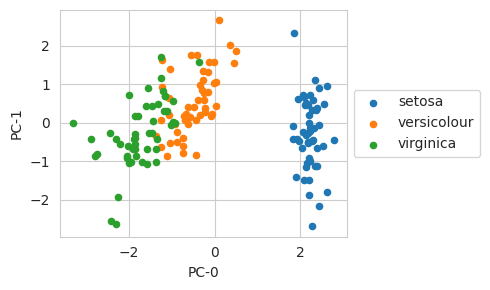

In [167]:
fig, ax = plt.subplots(figsize=(5, 3))

for label, color, clazz in zip(y.unique(), sns.color_palette('tab10'), ['setosa', 'versicolour', 'virginica']):
    P[y==label].plot(kind='scatter', x='PC-0', y='PC-1', color=color, ax=ax, label=clazz)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()


### Another view of U and VT
If we regress each PC on Z, we recover the eigenvectors and compare the 2 regressions below to VT.



In [169]:
from sklearn.linear_model import LinearRegression
m = LinearRegression(fit_intercept=False)
m.fit(Z, P['PC-0'])

m.coef_

array([-0.52106591,  0.26934744, -0.5804131 , -0.56485654])

In [170]:
m = LinearRegression(fit_intercept=False)
m.fit(Z, P['PC-1'])

m.coef_

array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])

In [171]:
pd.DataFrame(VT, columns=X.columns, index=[f'PC-{i}' for i in range(VT.shape[1])])

,s_length,s_width,p_length,p_width
PC-0,-0.521066,0.269347,-0.580413,-0.564857
PC-1,-0.377418,-0.923296,-0.024492,-0.066942
PC-2,0.719566,-0.244382,-0.142126,-0.634273
PC-3,0.261286,-0.123510,-0.801449,0.523597


Ok and that's it!  
This notebook was kind of a combo between these 2 resources:

[Here](https://datascience.oneoffcoder.com/pca-iris.html) and [here](https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2).